In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os
import numpy as np
import datetime as dt
%config IPCompleter.greedy=True

In [2]:
print(os.getcwd())

/Users/montealvo/Documents/SB_DataScience/Capstone/Mass_Mobilization


### Table of Contents

* [Data Collection](#data_collection)
    * [Data Loading](#data_load)
        * [First Inspection](#first_insp)
    * [Data Joining](#data_join)
* [Data Definition](#data_definition)
    * [Participants Category](#participant_cat)
    * [Looking at protester demands](#protester_dem1)
        * [Combining protester demands](#demand_combo)
        * [Making new demand columns 0/1](#bool_demand)
    * [Looking at state response](#state_resp1)
        * [Combining state responses](#response_combo)
        * [Making new response columns 0/1](#bool_response)
        * [State First and Last response](#first_last)
    * [Counting demands and responses](#dem_res_count)
    * [Setting dates](#dtype_date)
    * [Looking at location](#location)
    * [Looking at protester violence](#violence)
    

### Data Collection <a class="anchor" id="data_collection"></a>

#### Data loading <a class="anchor" id="data_load"></a>

In [3]:
df = pd.read_csv('../Mass_Mobilization/raw_data/mmALL_073120_csv.csv')

#### First Inspection <a class="anchor" id="first_insp"></a>

In [4]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."


In [5]:
df.tail(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
17142,9102018000,Papua New Guinea,910,2018,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17143,9102019000,Papua New Guinea,910,2019,Oceania,0,0,NaN,NaN,NaN,...,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN
17144,9102020000,Papua New Guinea,910,2020,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [7]:
df.shape

(17145, 31)

In [8]:
df.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [9]:
df.describe()

,id,ccode,year,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence
count,1.714500e+04,17145.000000,17145.000000,17145.000000,17145.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15758.000000
mean,4.380888e+09,437.888189,2006.171654,0.888831,7.406299,15.455935,6.227836,2006.326465,15.580616,6.243520,2006.329221,0.256060
std,2.320550e+09,232.054953,8.987378,0.314351,11.854041,8.817037,3.461912,8.958007,8.803944,3.461745,8.959254,0.436469
min,2.019900e+08,20.000000,1990.000000,0.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,0.000000
25%,2.202010e+09,220.000000,1998.000000,1.000000,1.000000,8.000000,3.000000,1999.000000,8.000000,3.000000,1999.000000,0.000000
50%,4.342008e+09,434.000000,2007.000000,1.000000,3.000000,15.000000,6.000000,2007.000000,16.000000,6.000000,2007.000000,0.000000
75%,6.512005e+09,651.000000,2014.000000,1.000000,8.000000,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.000000,1.000000
max,9.102020e+09,910.000000,2020.000000,1.000000,143.000000,31.000000,12.000000,2020.000000,31.000000,12.000000,2020.000000,1.000000


In [10]:
df.iloc[:,[17,18,19,20,21]].describe() #Protester demands

,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4
count,14684,15238,2977,383,831
unique,5784,7,7,7,7
top,protesters,"political behavior, process","political behavior, process","price increases, tax policy",.
freq,1541,9680,1004,111,796


In [11]:
df.iloc[:,[22,23,24,25,26,27,28]].describe() #State responses

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
count,15208,2888,930,244,849,16,920
unique,7,7,7,6,7,5,5
top,ignore,arrests,arrests,accomodation,.,accomodation,.
freq,8239,764,231,65,796,9,913


In [12]:
df[['participants', 'participants_category']].describe()

,participants,participants_category
count,15746,9887
unique,781,6
top,100s,100-999
freq,1330,3204


In [13]:
df['participants'].value_counts()

100s                             1330
1000s                            1187
50+                              1138
50                               1005
1000                              978
                                 ... 
A few hundred people                1
2200                                1
500,000                             1
3700                                1
increasingly large gatherings       1
Name: participants, Length: 781, dtype: int64

#### Data joining <a class="anchor" id="data_join"></a>

The participants column did not only solely contain integers i.e 100s. In order to clean this up, I considered participants category when available and chose the mid range of the category if available i.e if participants was noted as 100s, and participant category is 100-999, new participants_int number is 450 . Otherwise the lowest notated number i.e if participants was noted as 100s, and participant category was not available, participant_int is 100.

In [14]:
participants_int = pd.read_csv('../Mass_Mobilization/raw_data/mm_participants_id_updated.csv', index_col='id')

In [15]:
df = pd.merge(df, participants_int, on=['id'])

In [16]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,participants_int
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,1500.0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,1000.0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",500.0


### Chapter 2 <a class="anchor" id="data_definition"></a>

#### Participants Category <a class="anchor" id="participant_cat"></a>

The categories for Participants Category were set after collection of the data had begun and thus this information was not available for every demonstration

In [17]:
pc_ranges= [0,50,99,999,1999,4999,10000,np.inf]
pc_names=['0-50','50-99','100-999','1000-1999','2000-4999','5000-10000','>10000']
df['new_participants_category']= pd.cut(df['participants_int'], bins=pc_ranges, labels = pc_names)
df[['new_participants_category', 'participants_int']]

,new_participants_category,participants_int
0,1000-1999,1500.0
1,1000-1999,1000.0
2,100-999,500.0
3,100-999,550.0
4,100-999,950.0
...,...,...
16301,50-99,75.0
16302,50-99,75.0
16303,100-999,100.0
16304,NaN,NaN


#### Looking at protester demands <a class="anchor" id="protester_dem1"></a>

Upon first inspection, I noticed that some protestor demands and state responses had a "." Replacing with an empty string

In [18]:
demands = df[['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']]

In [19]:
demands.head()

,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4
0,"political behavior, process",labor wage dispute,NaN,NaN
1,"political behavior, process",NaN,NaN,NaN
2,"political behavior, process",NaN,NaN,NaN
3,land farm issue,NaN,NaN,NaN
4,"political behavior, process",NaN,NaN,NaN


In [20]:
demands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protesterdemand1  14510 non-null  object
 1   protesterdemand2  2675 non-null   object
 2   protesterdemand3  315 non-null    object
 3   protesterdemand4  817 non-null    object
dtypes: object(4)
memory usage: 637.0+ KB


In [21]:
demands['protesterdemand4'].describe()

count     817
unique      7
top         .
freq      796
Name: protesterdemand4, dtype: object

In [22]:
demands = demands.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#stripping white space

In [23]:
demands = demands.apply(lambda x: x.replace('\.', np.NaN, regex= True) if x.dtype == "object" else x)
#replacing "." with NAN

In [24]:
demands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protesterdemand1  14510 non-null  object
 1   protesterdemand2  2675 non-null   object
 2   protesterdemand3  315 non-null    object
 3   protesterdemand4  21 non-null     object
dtypes: object(4)
memory usage: 637.0+ KB


In [25]:
demands['protesterdemand4'].describe()
#confirming it worked

count                   21
unique                   6
top       police brutality
freq                     7
Name: protesterdemand4, dtype: object

In [26]:
demands['protesterdemand4'].value_counts()
#no more "."

police brutality               7
removal of politician          4
land farm issue                3
political behavior, process    3
price increases, tax policy    2
labor wage dispute             2
Name: protesterdemand4, dtype: int64

In [27]:
df['protesterdemand4'].value_counts()
#change did not apply to the original df
#Merging demands and df and dropping  under cleanup section

.                              796
police brutality                 7
removal of politician            4
land farm issue                  3
political behavior, process      3
price increases, tax policy      2
labor wage dispute               2
Name: protesterdemand4, dtype: int64

#### Combining protester demands into 1 column <a class="anchor" id="demand_combo"></a>

In [28]:
#Note: Protester demands are uniform across columns
df['demand_combo'] = demands.stack().groupby(level=0).apply('; '.join)

In [29]:
type(df['demand_combo'])

pandas.core.series.Series

In [30]:
type(df.loc[0,'demand_combo'])

str

In [31]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,participants_int,new_participants_category,demand_combo
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,1500.0,1000-1999,"political behavior, process; labor wage dispute"
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,1000.0,1000-1999,"political behavior, process"
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",500.0,100-999,"political behavior, process"


#### Making new columns for each demand 0/1 <a class="anchor" id="bool_demand"></a>

In [32]:
df['labor_wage_dispute'] = df.demand_combo.str.contains('labor wage dispute').astype('category')

In [33]:
df['land_farm_issue'] = df.demand_combo.str.contains('land farm issue').astype('category')

In [34]:
df['police_brutality'] = df.demand_combo.str.contains('police brutality').astype('category')

In [35]:
df['political_behavior'] = df.demand_combo.str.contains('political behavior, process').astype('category')

In [36]:
df['price_increases_tax_policy'] = df.demand_combo.str.contains('price increases, tax policy').astype('category')

In [37]:
df['removal_of_politician'] = df.demand_combo.str.contains('removal of politician').astype('category')

In [38]:
df['social_restrictions'] = df.demand_combo.str.contains('social restrictions').astype('category')

In [39]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,participants_int,new_participants_category,demand_combo,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior,price_increases_tax_policy,removal_of_politician,social_restrictions
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,1500.0,1000-1999,"political behavior, process; labor wage dispute",True,False,False,True,False,False,False
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1000.0,1000-1999,"political behavior, process",False,False,False,True,False,False,False
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,500.0,100-999,"political behavior, process",False,False,False,True,False,False,False


#### Looking at state response <a class="anchor" id="state_resp1"></a>

In [40]:
responses = df[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']]

In [41]:
responses.head()

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
0,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [42]:
responses[responses['stateresponse1'].isnull()]

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,NaN,NaN,NaN,NaN,NaN,NaN,.
16304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.iloc[16305]

id                                  9102019000
country                       Papua New Guinea
ccode                                      910
year                                      2019
region                                 Oceania
protest                                      0
protestnumber                                0
startday                                   NaN
startmonth                                 NaN
startyear                                  NaN
endday                                     NaN
endmonth                                   NaN
endyear                                    NaN
protesterviolence                          NaN
location                                   NaN
participants_category                      NaN
participants                               NaN
protesteridentity                          NaN
protesterdemand1                           NaN
protesterdemand2                           NaN
protesterdemand3                           NaN
protesterdema

In [44]:
responses = responses.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#stripping white space

In [45]:
responses = responses.replace('\.', np.NaN, regex = True) 
#replacing "." with NAN

In [46]:
responses.iloc[16305]
#confirming it worked

stateresponse1    NaN
stateresponse2    NaN
stateresponse3    NaN
stateresponse4    NaN
stateresponse5    NaN
stateresponse6    NaN
stateresponse7    NaN
Name: 16305, dtype: object

#### Combining state responses into 1 column <a class="anchor" id="response_combo"></a>

In [47]:
#Note: State responses are uniform across columns
df['response_combo'] = responses.stack().groupby(level=0).apply(','.join)

In [48]:
type(df['response_combo'])

pandas.core.series.Series

In [49]:
type(df.loc[0,'response_combo'])

str

In [50]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,new_participants_category,demand_combo,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior,price_increases_tax_policy,removal_of_politician,social_restrictions,response_combo
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,1000-1999,"political behavior, process; labor wage dispute",True,False,False,True,False,False,False,ignore
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1000-1999,"political behavior, process",False,False,False,True,False,False,False,ignore
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,100-999,"political behavior, process",False,False,False,True,False,False,False,ignore
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,100-999,land farm issue,False,True,False,False,False,False,False,accomodation
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,100-999,"political behavior, process",False,False,False,True,False,False,False,"crowd dispersal,arrests,accomodation"


#### Making new columns for each response 0/1 <a class="anchor" id="bool_response"></a>

In [51]:
df['accomodation'] = df.response_combo.str.contains('accomodation').astype('category')

In [52]:
df['arrests'] = df.response_combo.str.contains('arrests').astype('category')

In [53]:
df['beatings'] = df.response_combo.str.contains('beatings').astype('category')

In [54]:
df['crowd_dispersal'] = df.response_combo.str.contains('crowd dispersal').astype('category')

In [55]:
df['ignore'] = df.response_combo.str.contains('ignore').astype('category')

In [56]:
df['killings'] = df.response_combo.str.contains('killings').astype('category')

In [57]:
df['shootings'] = df.response_combo.str.contains('shootings').astype('category')

In [58]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,removal_of_politician,social_restrictions,response_combo,accomodation,arrests,beatings,crowd_dispersal,ignore,killings,shootings
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,False,False,ignore,False,False,False,False,True,False,False
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,False,False,ignore,False,False,False,False,True,False,False
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,False,False,ignore,False,False,False,False,True,False,False


#### State First and Last response <a class="anchor" id="first_last"></a>

In [59]:
state_response = df['response_combo']

In [60]:
state_response.head()

0                                  ignore
1                                  ignore
2                                  ignore
3                            accomodation
4    crowd dispersal,arrests,accomodation
Name: response_combo, dtype: object

In [61]:
state_response.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16296, 16297, 16298, 16299, 16300, 16301, 16302, 16303, 16304,
            16305],
           dtype='int64', length=16306)

In [62]:
df['first_response']= df['response_combo'].str.split(',').str[0]

In [63]:
df['first_response'].value_counts().index

Index(['ignore', 'crowd dispersal', 'arrests', 'accomodation', 'shootings',
       'beatings', 'killings'],
      dtype='object')

In [64]:
df['last_response']= df['response_combo'].str.split(',').str[-1]

In [65]:
df['last_response'].value_counts()

ignore             7722
crowd dispersal    2922
accomodation       1378
arrests            1376
killings            439
beatings            367
shootings           278
Name: last_response, dtype: int64

#### Counting demands and responses <a class="anchor" id="dem_res_count"></a>

In [66]:
new_demands = df[['labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions']]

In [67]:
df['demands_count'] = new_demands.sum(axis=1).astype('int')

In [68]:
new_responses = df[['accomodation','arrests','beatings','crowd_dispersal','ignore', 'killings','shootings']]

In [69]:
df['responses_count'] = new_responses.sum(axis=1).astype('int')

In [70]:
df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,arrests,beatings,crowd_dispersal,ignore,killings,shootings,first_response,last_response,demands_count,responses_count
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,False,False,False,True,False,False,ignore,ignore,2,1
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,False,False,False,True,False,False,ignore,ignore,1,1
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,False,False,False,True,False,False,ignore,ignore,1,1


In [71]:
df[['id','participants','participants_category','new_participants_category', 'participants_int','demands_count', 'responses_count' ]]

,id,participants,participants_category,new_participants_category,participants_int,demands_count,responses_count
0,201990001,1000s,NaN,1000-1999,1500.0,2,1
1,201990002,1000,NaN,1000-1999,1000.0,1,1
2,201990003,500,NaN,100-999,500.0,1,1
3,201990004,100s,NaN,100-999,550.0,1,1
4,201990005,950,NaN,100-999,950.0,1,3
...,...,...,...,...,...,...,...
16301,9102017001,50+,50-99,50-99,75.0,2,1
16302,9102017002,50+,50-99,50-99,75.0,1,1
16303,9102017003,About 100,100-999,100-999,100.0,1,1
16304,9102018000,NaN,NaN,NaN,NaN,0,0


In [72]:
(df['responses_count'] > 0).mean()

0.8881393352140317

#### Setting dates <a class="anchor" id="dtype_date"></a>

In [73]:
df['start_date'] = pd.to_datetime((df.startyear*10000+df.startmonth*100+df.startday),format='%Y%m%d')

In [74]:
df['end_date'] = pd.to_datetime((df.endyear*10000+df.endmonth*100+df.endday),format='%Y%m%d')

In [75]:
df['end_date']

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-09-06
4       1990-08-15
           ...    
16301   2017-06-15
16302   2017-07-15
16303   2017-10-31
16304          NaT
16305          NaT
Name: end_date, Length: 16306, dtype: datetime64[ns]

#### Looking at location <a class="anchor" id="location"></a>

In [83]:
df[['country','region','location']]

,country,region,location
0,Canada,North America,national
1,Canada,North America,"Montreal, Quebec"
2,Canada,North America,"Montreal, Quebec"
3,Canada,North America,"Montreal, Quebec"
4,Canada,North America,"Montreal, Quebec"
...,...,...,...
16301,Papua New Guinea,Oceania,Bougainville
16302,Papua New Guinea,Oceania,Mount Hagen
16303,Papua New Guinea,Oceania,Lorengau
16304,Papua New Guinea,Oceania,NaN


In [84]:
df['country'].value_counts()

United Kingdom           547
France                   527
Ireland                  434
Germany                  360
Kenya                    350
                        ... 
Germany East              11
South Sudan                9
Czechoslovakia             6
Serbia and Montenegro      5
Germany West               2
Name: country, Length: 166, dtype: int64

In [85]:
df['country'].describe()

count              16306
unique               166
top       United Kingdom
freq                 547
Name: country, dtype: object

In [86]:
df['region'].value_counts()

Europe             5263
Africa             3612
Asia               3289
South America      1647
MENA               1405
North America       558
Central America     483
Oceania              49
Name: region, dtype: int64

In [87]:
df['region'].describe()

count      16306
unique         8
top       Europe
freq        5263
Name: region, dtype: object

In [88]:
df['location'].value_counts()

nationwide                    270
national                      246
national level                236
Athens                        226
Dublin                        218
                             ... 
Cochabamba and La Paz           1
Turanj                          1
Bucharest and other cities      1
arica                           1
Khao Yai National Park          1
Name: location, Length: 4265, dtype: int64

In [89]:
df['location'].describe()

count          14490
unique          4265
top       nationwide
freq             270
Name: location, dtype: object

#### Looking at protester violence <a class="anchor" id="violence"></a>

In [90]:
df['protesterviolence'].describe()

count    15030.000000
mean         0.253759
std          0.435176
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: protesterviolence, dtype: float64

In [91]:
df['protesterviolence'].value_counts()

0.0    11216
1.0     3814
Name: protesterviolence, dtype: int64

 ### Data Cleaning <a class="anchor" id="data_cleaning"></a>

In [92]:
#Attach demands to df
df2= pd.merge(df, demands, how='left', left_index=True, right_index=True)

In [93]:
df2= pd.merge(df2, responses, how='left', left_index=True, right_index=True)

In [94]:
df2.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand2_y,protesterdemand3_y,protesterdemand4_y,stateresponse1_y,stateresponse2_y,stateresponse3_y,stateresponse4_y,stateresponse5_y,stateresponse6_y,stateresponse7_y
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          16306 non-null  int64         
 1   country                     16306 non-null  object        
 2   ccode                       16306 non-null  int64         
 3   year                        16306 non-null  int64         
 4   region                      16306 non-null  object        
 5   protest                     16306 non-null  int64         
 6   protestnumber               16306 non-null  int64         
 7   startday                    14511 non-null  float64       
 8   startmonth                  14511 non-null  float64       
 9   startyear                   14511 non-null  float64       
 10  endday                      14511 non-null  float64       
 11  endmonth                    14511 non-null  float64   

In [97]:
df2['stateresponse5_y'].value_counts()

accomodation       16
arrests            14
crowd dispersal     9
killings            7
beatings            3
shootings           3
Name: stateresponse5_y, dtype: int64

In [98]:
df2['protesterdemand4_y'].value_counts()

police brutality               7
removal of politician          4
land farm issue                3
political behavior, process    3
price increases, tax policy    2
labor wage dispute             2
Name: protesterdemand4_y, dtype: int64

In [ ]:
df2.drop(['protesterdemand1_x','protesterdemand2_x','protesterdemand3_x','protesterdemand4_x','stateresponse1_x', 'stateresponse2_x', 'stateresponse3_x', 'stateresponse4_x',
       'stateresponse5_x', 'stateresponse6_x', 'stateresponse7_x'], axis = 1, inplace=True) 

In [99]:
#Filling notes with blank string
df2['notes'].fillna("", inplace = True) 

In [116]:
#dropping old participant number columns
df2.drop(['participants_category','participants'], axis = 1, inplace=True) 

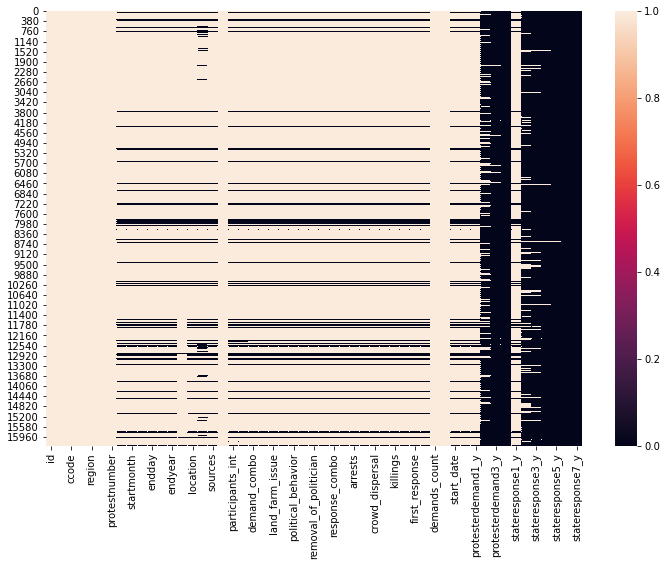

In [117]:
plt.figure(figsize = (12,8))
sns.heatmap(df2.notna())
plt.show()

In [107]:
df2.location.replace(to_replace = "national", value="nationwide", inplace=True)

In [108]:
df2.location.replace(to_replace = "national level", value="nationwide", inplace=True)

In [110]:
df2['location'].value_counts()

nationwide                    752
Athens                        226
Dublin                        218
National                      218
Seoul                         217
                             ... 
Cochabamba and La Paz           1
Turanj                          1
Bucharest and other cities      1
arica                           1
Khao Yai National Park          1
Name: location, Length: 4263, dtype: int64

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 0 to 16305
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          16306 non-null  int64         
 1   country                     16306 non-null  object        
 2   ccode                       16306 non-null  int64         
 3   year                        16306 non-null  int64         
 4   region                      16306 non-null  object        
 5   protest                     16306 non-null  int64         
 6   protestnumber               16306 non-null  int64         
 7   startday                    14511 non-null  float64       
 8   startmonth                  14511 non-null  float64       
 9   startyear                   14511 non-null  float64       
 10  endday                      14511 non-null  float64       
 11  endmonth                    14511 non-null  float64   

In [129]:
df2.dropna(axis = 0, subset = ['stateresponse1_y','stateresponse2_y','stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y'], thresh= 1).shape

(14482, 53)

Dropping any row that does not have a state response

In [123]:
df2.dropna(axis = 0, subset = ['stateresponse1_y','stateresponse2_y','stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y'], thresh= 1, inplace=True)

In [127]:
df2.isna().sum()

id                                0
country                           0
ccode                             0
year                              0
region                            0
protest                           0
protestnumber                     0
startday                          0
startmonth                        0
startyear                         0
endday                            0
endmonth                          0
endyear                           0
protesterviolence                 0
location                         20
protesteridentity               554
sources                           4
notes                             0
participants_int                 17
new_participants_category        17
demand_combo                      0
labor_wage_dispute                0
land_farm_issue                   0
police_brutality                  0
political_behavior                0
price_increases_tax_policy        0
removal_of_politician             0
social_restrictions         

In [130]:
df2.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand2_y,protesterdemand3_y,protesterdemand4_y,stateresponse1_y,stateresponse2_y,stateresponse3_y,stateresponse4_y,stateresponse5_y,stateresponse6_y,stateresponse7_y
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


In [131]:
df2.to_csv('df.csv', index=False)